<a href="https://colab.research.google.com/github/Richmond-Andoh/AI_Projects/blob/main/Lab_6_11254304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [76]:
# Load the dataset
data = 'data/customer.csv'
df = pd.read_csv(data)

# Display the initial DataFrame
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [77]:
# Drop CCustomerID column
df = df.drop('CustomerID', axis=1)

In [78]:
# Encode the gender column
encoder = OneHotEncoder(drop='first', sparse_output=False)
gender = encoder.fit_transform(df[['Gender']])
df = pd.concat([df, pd.DataFrame(gender, columns=['Sex'])], axis=1)
df = df.drop('Gender', axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100),Sex
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0
...,...,...,...,...
195,35,120,79,0.0
196,45,126,28,0.0
197,32,126,74,1.0
198,32,137,18,1.0


In [79]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [80]:
# Scale the relevant columns
scaler = StandardScaler()
scaled_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

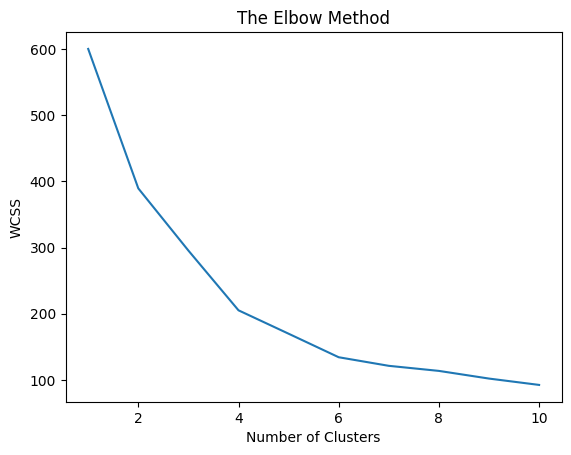

In [81]:
# Determine optimal number of clusters using the Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df[scaled_columns])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [82]:
# Optimal k from the elbow method
optimal_k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [87]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['K-Means'] = kmeans.fit_predict(df[scaled_columns])  # Ensure this line is executed

# Check if 'K-Means' is added
print(df.columns)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Sex',
       'K-Means'],
      dtype='object')


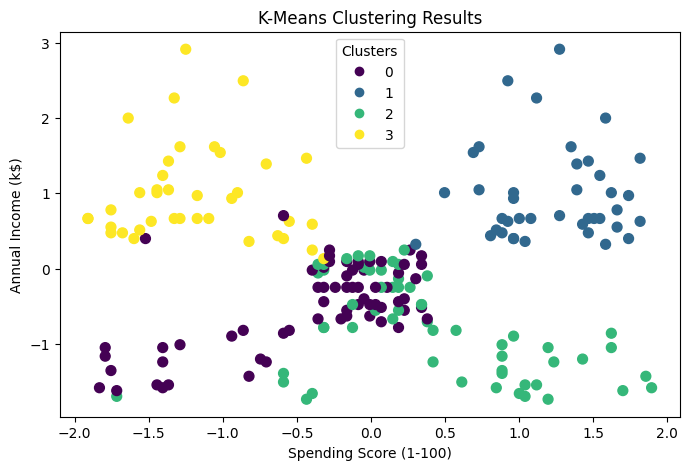

In [88]:

# Visualize K-Means clustering results
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=df['K-Means'], cmap='viridis', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


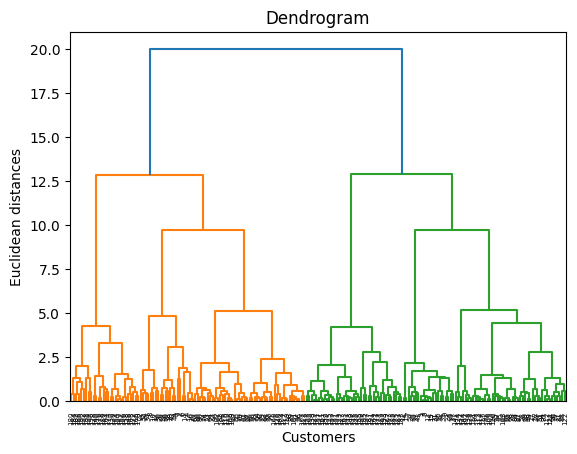

In [89]:
# Create dendrogram for hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(df[scaled_columns], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [90]:
# Perform hierarchical clustering
hierarchical = sch.fcluster(sch.linkage(df[scaled_columns], method='ward'), t=optimal_k, criterion='maxclust')
df['Hierarchical'] = hierarchical

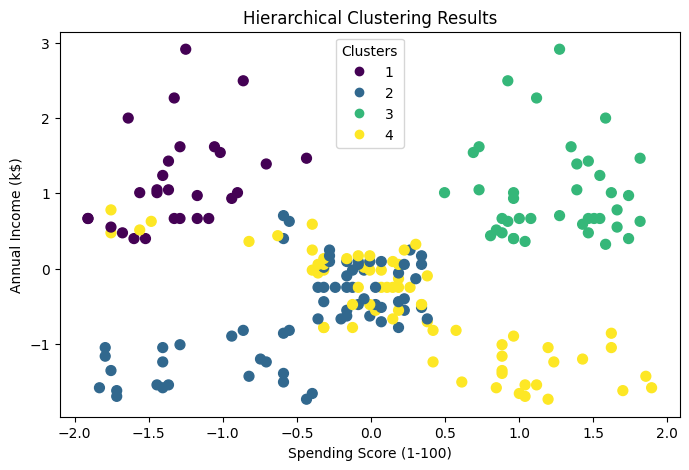

In [91]:
# Visualize Hierarchical clustering results
plt.figure(figsize=(8, 5))
scatter_hierarchical = plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=df['Hierarchical'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(*scatter_hierarchical.legend_elements(), title="Clusters")
plt.show()

In [92]:
# Compare K-Means and Hierarchical clustering results
df = pd.DataFrame({'K-Means': kmeans.labels_, 'Hierarchical': df['Hierarchical']})
df

,K-Means,Hierarchical
0,2,2
1,2,4
2,2,2
3,2,4
4,2,2
...,...,...
195,1,3
196,3,1
197,1,3
198,3,1


In [95]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()

# Verify the columns
print(df.columns)


Index(['K-Means', 'Hierarchical'], dtype='object')


In [108]:
# Verify the columns
print("DataFrame Columns:")
print(df.columns)

print(scaled_columns)

silhouette_kmeans = silhouette_score(df[scaled_columns], kmeans.labels_)
silhouette_hierarchical = silhouette_score(df[scaled_columns], df['Hierarchical'])
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical}")


DataFrame Columns:
Index(['K-Means', 'Hierarchical'], dtype='object')
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


KeyError: "None of [Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')] are in the [columns]"